In [18]:
#RESOURCE INITIALIZATION

import pyvisa
import time
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import module
from datetime import datetime

linestyle_tuple = [
     ('solid',                 (0, ())),
     ('dashed',                (0, (5, 5))),
     ('dotted',                (0, (1, 1))),

     ('loosely dotted',        (0, (1, 10))),

     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),

     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

headers = ["VDS","VGS","VBS","IDS"]

# get current date and time

current_datetime = datetime.now()
print("Measurement Start time : ", current_datetime)


current_datetime = datetime.now()
print("Current date & time : ", current_datetime)
  
# convert datetime obj to string
str_current_datetime = str(current_datetime)

filename1 = datetime.now().strftime("%Y%m%d-%H%M%S")

file_name = "try1.csv"
print("file_name:", file_name)


Measurement Start time :  2023-11-30 13:41:28.688662
Current date & time :  2023-11-30 13:41:28.694658
file_name: try1.csv


Resorce not found, plotting existing data...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


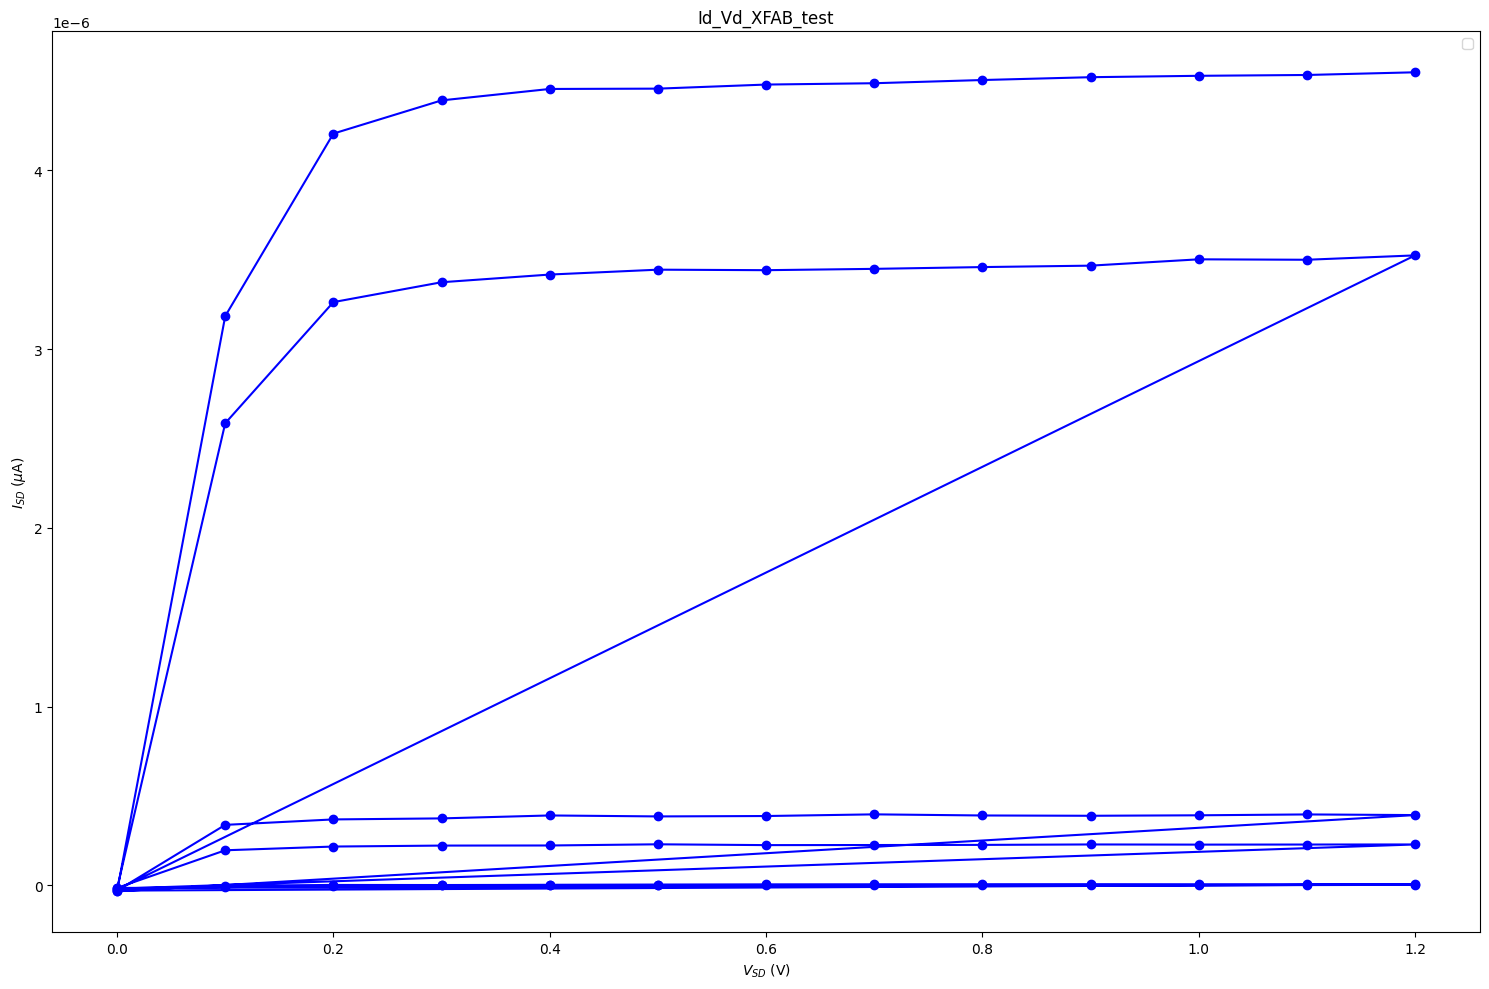

In [19]:
# PMOS IDS vs VDS Optimised  
try:  
    resource_manager = pyvisa.ResourceManager()
    # You can change the variable name and resource name
    keithley_2450_VGS = resource_manager.open_resource("TCPIP0::192.168.1.50::inst0::INSTR",timeout = 25000)
    keithley_2450_VBS = resource_manager.open_resource("TCPIP0::192.168.1.8::inst0::INSTR",timeout = 25000)
    keithley_2450_VDS = resource_manager.open_resource("TCPIP0::192.168.1.39::inst0::INSTR",timeout = 25000)

    #########################################################################################

    keithley_2450_VBS.write("*RST")                            # Reset the SMU to default configuration
    keithley_2450_VBS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
    keithley_2450_VBS.write("SENS:CURR:RANG:AUTO:LLIM 1e-6")         # Set the current measurement range mode as AUTO


    keithley_2450_VBS.write("SOUR:FUNC VOLT")                  # Set the SMU as Voltage source
    keithley_2450_VBS.write("SOUR:VOLT 0")                     # Set the Voltage to 0 Volt
    keithley_2450_VBS.write("SOUR:VOLT:ILIM "+str(3e-3))     # Set the current limit to 3 mA

    #########################################################################################

    keithley_2450_VGS.write("*RST")                            # Reset the SMU to default configuration
    keithley_2450_VGS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
    keithley_2450_VGS.write("SENS:CURR:RANG:AUTO:LLIM 1e-5")         # Set the current measurement range mode as AUTO


    keithley_2450_VGS.write("SOUR:FUNC VOLT")                  # Set the SMU as Voltage source
    keithley_2450_VGS.write("SOUR:VOLT 0")                     # Set the Voltage to 0 Volt
    keithley_2450_VGS.write("SOUR:VOLT:ILIM "+str(1e-3))    # Set the current limit to 100 uA

    #########################################################################################

    keithley_2450_VDS.write("*RST")                           # Reset the SMU to default configuration 
    keithley_2450_VDS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
    keithley_2450_VDS.write("SENS:CURR:RANG:AUTO ON")         # Set the current measurement range mode as AUTO
    keithley_2450_VDS.write("SENS:CURR:NPLCycles 1")         # Set the current measurement range mode as AUTO


    #keithley_2450_VDS.write("SENS:CURR:RSEN ON")             # Set the SMU to 4 wire measurement setup

    keithley_2450_VDS.write("SOUR:VOLT 0")                    # Set the Voltage to 0 Volt 
    keithley_2450_VDS.write("SOUR:VOLT:ILIM "+str(10e-3))   # Set the current limit to 10 mA
    keithley_2450_VDS.write("SOUR:FUNC VOLT")                 # Set the SMU as Voltage source
    #keithley_2450_VDS.write("SOUR:VOLT:DEL 0.5")

    #########################################################################################

    keithley_2450_VBS.write(":OUTP:STAT ON") # Turn ON the Output of SMU
    keithley_2450_VGS.write(":OUTP:STAT ON") # Turn ON the Output of SMU
    keithley_2450_VDS.write(":OUTP:STAT ON") # Turn ON the Output of SMU

    time.sleep(1)

    keithley_2450_VBS.query("*OPC?")        # Operation complete command
    keithley_2450_VGS.query("*OPC?")        # Operation complete command
    keithley_2450_VDS.query("*OPC?")        # Operation complete command

    step_VBS = 0.3 #[0.5]
    step_VGS = 0.3#[0.05]
    step_VDS = 0.05#[0.025]


    #value_VBS = [round(b, 3) for b in list(np.arange(-0.3,0.7,step_VBS))]  #-0.5 0 0.05 1 1.35 (Body values)
    value_VBS = [0,0.1] #for discrete body bias please enter the values here and comment above
    value_VGS = [0.2,0.4,0.6] 
    #value_VGS = [0,0.5,1]
    value_VDS = [round(d, 3) for d in list(np.arange(0,1.21,step_VDS))]

    #value_VBS_nmos = [0]   #0 0.05 0.1
    #value_VDS_nmos = [round(d, 3) for d in list(np.arange(0,1.9,0.05))]   #0 0.1 ... 1.8     #0 0.9 1.8
    #value_VGS_nmos = [round(g, 3) for g in list(np.arange(0.9,1.9,0.9))] 
    
    # Create lists to store data for plotting
    vds_list = []
    vgs_list = []
    vbs_list = []
    ids_list = []
    ib_list = []
    igs_list = []

    #Empty Plot   
    fig, ax = plt.subplot()                 
    line = ax.plot(vds_list, ids_list, marker='o', linestyle='-', color='b')

    plt.title('Id_Vd_XFAB_test')
    plt.ylabel('$I_{SD}$ ($\mu$A)')
    plt.xlabel('$V_{SD}$ (V)')
    plt.legend(loc='best')

    with open(file_name, "w", newline="") as csvfile:
        logfile = csv.writer(csvfile)
        logfile.writerow(["VDS", "VGS", "VBS", "IDS", "IB", "IGS"])

        for b in range(0, len(value_VBS), 1):
            keithley_2450_VBS.write("SOUR:VOLT " + str(value_VBS[b]))
            for g in range(0, len(value_VGS), 1):  # y(3,16,2)
                keithley_2450_VGS.write("SOUR:VOLT " + str(value_VGS[g]))
                current1 = keithley_2450_VBS.query_ascii_values("MEAS:CURR?")
                current2 = keithley_2450_VGS.query_ascii_values("MEAS:CURR?")
                for d in range(0, len(value_VDS), 1):  # x(0,19,1)
                    keithley_2450_VDS.write("SOUR:VOLT " + str(value_VDS[d]))
                    keithley_2450_VDS.query("*OPC?")
                    time.sleep(0.1)
                    current_IDS = keithley_2450_VDS.query_ascii_values("READ?")
                    current_IB = keithley_2450_VBS.query_ascii_values("READ?")
                    current_IGS = keithley_2450_VGS.query_ascii_values("READ?")
                    logfile.writerow([value_VDS[d], value_VGS[g], value_VBS[b], current_IDS[0], current_IB[0], current_IGS[0]])

                    # Append data to lists for plotting
                    vds_list.append(value_VDS[d])
                    vgs_list.append(value_VGS[g])
                    vbs_list.append(value_VBS[b])
                    ids_list.append(current_IDS[0])
                    ib_list.append(current_IB[0])
                    igs_list.append(current_IGS[0])

                    #Update the plot
                    line.set_data(vds_list, ids_list)

                    plt.pause(0.001)  # Pause to allow the plot to update


    # Saving the figure.

    plt.savefig(file_name.replace("csv","svg"),dpi=200)

    plt.show()

    # get current date and time
    current_datetime = datetime.now()
    print("Current date & time : ", current_datetime)

    # convert datetime obj to string
    str_current_datetime = str(current_datetime)

    filename2 = datetime.now().strftime("%Y%m%d-%H%M%S")

    plt.show()

    time.sleep(1)    

    keithley_2450_VDS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU
    keithley_2450_VGS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU
    keithley_2450_VBS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU

    keithley_2450_VBS.close()
    keithley_2450_VGS.close()
    keithley_2450_VDS.close()
except:
    print("Resorce not found, plotting existing data...")       
    data = pd.read_csv(file_name)
    vds_list = data["VDS"].tolist()
    vgs_list = data["VGS"].tolist()
    vbs_list = data["VBS"].tolist()
    ids_list = data["IDS"].tolist()
    ib_list = data["IB"].tolist()
    igs_list = data["IGS"].tolist()
    plt.plot(vds_list, ids_list, marker='o', linestyle='-', color='b')

    plt.title('Id_Vd_XFAB_test')
    plt.ylabel('$I_{SD}$ ($\mu$A)')
    plt.xlabel('$V_{SD}$ (V)')
    plt.legend(loc='best')

    plt.show()

In [20]:
# Plot PMOS IDS vs VDS
try:
  plt.rcParams["figure.figsize"] = [15, 10]
  plt.rcParams["figure.autolayout"] = True

  headers = ["VDS","VGS","VBS","IDS","IB","IGS"]

  df = pd.read_csv(file_name)



  #plt.plot(df.Voltage ,df.Current)
  #plt.plot(total_lengths, sort_times_heap, 'b-', label="Heap")

  i = 0
  for b in range (0,len(value_VBS),1):  
    for g in range (0,len(value_VGS),1) : 
      plt.plot(df.VDS[i*(len(value_VDS)):(i+1)*(len(value_VDS))], df.IDS[i*(len(value_VDS)):(i+1)*(len(value_VDS))]*1e6, label='VGS = '+str(df.VGS[g*len(value_VDS)])+' V and VBS = '+str(df.VBS[(b)*len(value_VGS)*len(value_VDS)])+' V',color="rbgkmcyrbgkmcy"[g],linestyle=linestyle_tuple[b][1])
      i = i + 1


  resource_manager = pyvisa.ResourceManager()
  # You can change the variable name and resource name
  keithley_2450_VGS = resource_manager.open_resource("TCPIP0::192.168.1.50::inst0::INSTR",timeout = 25000)
  keithley_2450_VBS = resource_manager.open_resource("TCPIP0::192.168.1.8::inst0::INSTR",timeout = 25000)
  keithley_2450_VDS = resource_manager.open_resource("TCPIP0::192.168.1.39::inst0::INSTR",timeout = 25000)

  #########################################################################################

  keithley_2450_VBS.write("*RST")                            # Reset the SMU to default configuration
  keithley_2450_VBS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
  keithley_2450_VBS.write("SENS:CURR:RANG:AUTO:LLIM 1e-6")         # Set the current measurement range mode as AUTO


  keithley_2450_VBS.write("SOUR:FUNC VOLT")                  # Set the SMU as Voltage source
  keithley_2450_VBS.write("SOUR:VOLT 0")                     # Set the Voltage to 0 Volt
  keithley_2450_VBS.write("SOUR:VOLT:ILIM "+str(3e-3))     # Set the current limit to 3 mA

  #########################################################################################

  keithley_2450_VGS.write("*RST")                            # Reset the SMU to default configuration
  keithley_2450_VGS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
  keithley_2450_VGS.write("SENS:CURR:RANG:AUTO:LLIM 1e-5")         # Set the current measurement range mode as AUTO


  keithley_2450_VGS.write("SOUR:FUNC VOLT")                  # Set the SMU as Voltage source
  keithley_2450_VGS.write("SOUR:VOLT 0")                     # Set the Voltage to 0 Volt
  keithley_2450_VGS.write("SOUR:VOLT:ILIM "+str(100e-6))    # Set the current limit to 100 uA

  #########################################################################################

  keithley_2450_VDS.write("*RST")                           # Reset the SMU to default configuration 
  keithley_2450_VDS.write(":ROUT:TERM REAR")                 # Set the output to the rear Triaxial connector
  keithley_2450_VDS.write("SENS:CURR:RANG:AUTO ON")         # Set the current measurement range mode as AUTO
  keithley_2450_VDS.write("SENS:CURR:NPLCycles 1")         # Set the current measurement range mode as AUTO

  #keithley_2450_VDS.write("SENS:CURR:AVER:COUNT 10")
  #keithley_2450_VDS.write("SENS:CURR:AVER:TCON MOV")
  #keithley_2450_VDS.write("SENS:CURR:AVER ON")


  #keithley_2450_VDS.write("SENS:CURR:RSEN ON")             # Set the SMU to 4 wire measurement setup

  keithley_2450_VDS.write("SOUR:VOLT 0")                    # Set the Voltage to 0 Volt 
  keithley_2450_VDS.write("SOUR:VOLT:ILIM "+str(10e-3))   # Set the current limit to 10 mA
  keithley_2450_VDS.write("SOUR:FUNC VOLT")                 # Set the SMU as Voltage source
  #keithley_2450_VDS.write("SOUR:VOLT:DEL 0.5")

  #########################################################################################

  keithley_2450_VBS.write(":OUTP:STAT ON") # Turn ON the Output of SMU
  keithley_2450_VGS.write(":OUTP:STAT ON") # Turn ON the Output of SMU
  keithley_2450_VDS.write(":OUTP:STAT ON") # Turn ON the Output of SMU

  time.sleep(1)

  keithley_2450_VBS.query("*OPC?")        # Operation complete command
  keithley_2450_VGS.query("*OPC?")        # Operation complete command
  keithley_2450_VDS.query("*OPC?")        # Operation complete command



  step_VBS = 0.3 #[0.5]
  step_VDS = 0.5 #[0.9]
  step_VGS = 0.3 #[0.05]


  #value_VBS = [round(b, 3) for b in list(np.arange(-0.3,0.7,step_VBS))]  #0 0.05 0.1
  value_VBS = [0,0.1] #For discrete body bias please specify values here and comment above
  #value_VDS = [0.05] + [round(d, 3) for d in list(np.arange(0.5,1.5,step_VDS))]    #0.05 0.3 ... 1.8
  value_VDS = [0.2,0.4,0.6]
  value_VGS = [round(g, 3) for g in list(np.arange(0,1.21,step_VGS))]               #0 0.1 ... 1.8


  #value_VBS_nmos = [0]    #0 0.05 0.1
  #value_VDS_nmos = [1.8]#[0.05] + [round(d, 3) for d in list(np.arange(0.9,1.9,0.9))] #[0.05, 1.8]   #0.05 0.3 ... 1.8
  #value_VGS_nmos = [round(g, 3) for g in list(np.arange(0,1.9,0.05))]   #0 0.1 ... 1.8

  # Create lists to store data for plotting
  vds_list = []
  vgs_list = []
  vbs_list = []
  ids_list = []
  ib_list = []
  igs_list = []

  with open(file_name,"w",newline="") as csvfile :
    logfile = csv.writer(csvfile)
    logfile.writerow(["VDS","VGS","VBS","IDS","IB","IGS"])


    for b in range (0,len(value_VBS),1):  
      keithley_2450_VBS.write("SOUR:VOLT "+str(value_VBS[b]))  
      for d in range (0,len(value_VDS),1) : ##### y(3,16,2)
  #      keithley_2450_VGS.write("SOUR:VOLT "+str(y/10.0))
        keithley_2450_VDS.write("SOUR:VOLT "+str(value_VDS[d]))
        current1 = keithley_2450_VBS.query_ascii_values("MEAS:CURR?")

        for g in range (0,len(value_VGS),1) : #### x(0,19,1)
          keithley_2450_VGS.write("SOUR:VOLT "+str(value_VGS[g]))
          current2 = keithley_2450_VGS.query_ascii_values("MEAS:CURR?") 
          keithley_2450_VDS.query("*OPC?")

          time.sleep(0.1)
          current_IDS = keithley_2450_VDS.query_ascii_values("READ?")
          current_IB  = keithley_2450_VBS.query_ascii_values("READ?")
          current_IGS = keithley_2450_VGS.query_ascii_values("READ?")
          logfile.writerow([value_VDS[d],value_VGS[g],value_VBS[b],current_IDS[0],current_IB[0],current_IGS[0]])


          # Append data to lists for plotting
          vds_list.append(value_VDS[d])
          vgs_list.append(value_VGS[g])
          vbs_list.append(value_VBS[b])
          ids_list.append(current_IDS[0])
          ib_list.append(current_IB[0])
          igs_list.append(current_IGS[0])

          # Plot the data
          plt.plot(vds_list, ids_list, marker='o', linestyle='-', color='b')
          #PLOTTING
          plt.title('Id_Vd_XFAB_test')
          plt.ylabel('$I_{SD}$ ($\mu$A)')
          plt.xlabel('$V_{SD}$ (V)')
          plt.legend(loc='best')
          plt.pause(0.001)  # Pause to allow the plot to update

  time.sleep(1)    

  #keithley_2450.write("OUTP 0") # Turn OFF the Output of SMU
  keithley_2450_VDS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU
  keithley_2450_VGS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU
  keithley_2450_VBS.write(":OUTP:STAT OFF") # Turn OFF the Output of SMU

  #keithley_2450.write("OUTP 1")
  time.sleep(1)
  #voltage = keithley_2450.query_ascii_values("MEAS:VOLT?")
  #current = keithley_2450.query_ascii_values("MEAS:CURR?")

  time.sleep(1)
  #keithley_2450.write("OUTP 0")
  #print("Voltage was "+str(voltage[0])+". Current was "+str(current[0])+".")


  keithley_2450_VBS.close()
  keithley_2450_VGS.close()
  keithley_2450_VDS.close()
except:
    print("Resorce not found, plotting existing data")
    


Resorce not found, plotting existing data


In [21]:

# Plot NMOS IDS vs VGS
try:
  plt.rcParams["figure.figsize"] = [15, 10]
  plt.rcParams["figure.autolayout"] = True

  headers = ["VDS","VGS","VBS","IDS","IB","IGS"]

  df = pd.read_csv(file_name)

  i = 0
  for b in range (0,len(value_VBS),1):  
    for d in range (0,len(value_VDS),1) : ##### y(3,16,2)
      plt.plot(df.VGS[i*(len(value_VGS)):(i+1)*(len(value_VGS))], df.IDS[i*(len(value_VGS)):(i+1)*(len(value_VGS))]*1e6, label='VDS = '+str(df.VDS[d*len(value_VGS)])+' V and VBS = '+str(df.VBS[(b)*len(value_VGS)*len(value_VDS)])+' V',color="rbgkmcy"[d],linestyle=linestyle_tuple[b][1])
      i = i + 1
      #print(d)

      plt.title('Id_Vg_XFAB_test')
      plt.ylabel('$I_{SD}$ ($\mu$A)')
      plt.xlabel('$V_{SG}$ (V)')
      plt.legend(loc='best')
      plt.pause(0.001)


  # Saving the figure.

  plt.savefig(file_name.replace("csv","svg"),dpi=200)

  plt.show()

  current_datetime = datetime.now()
  print("Measurement End time : ", current_datetime)
except:
    print("Resorce not found, plotting existing data")



Resorce not found, plotting existing data
